In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

data_path ='../input/data_global.xlsx'

data = pd.read_excel(data_path)

# Rank-Sum Test

## GAIT SPEED

### APA

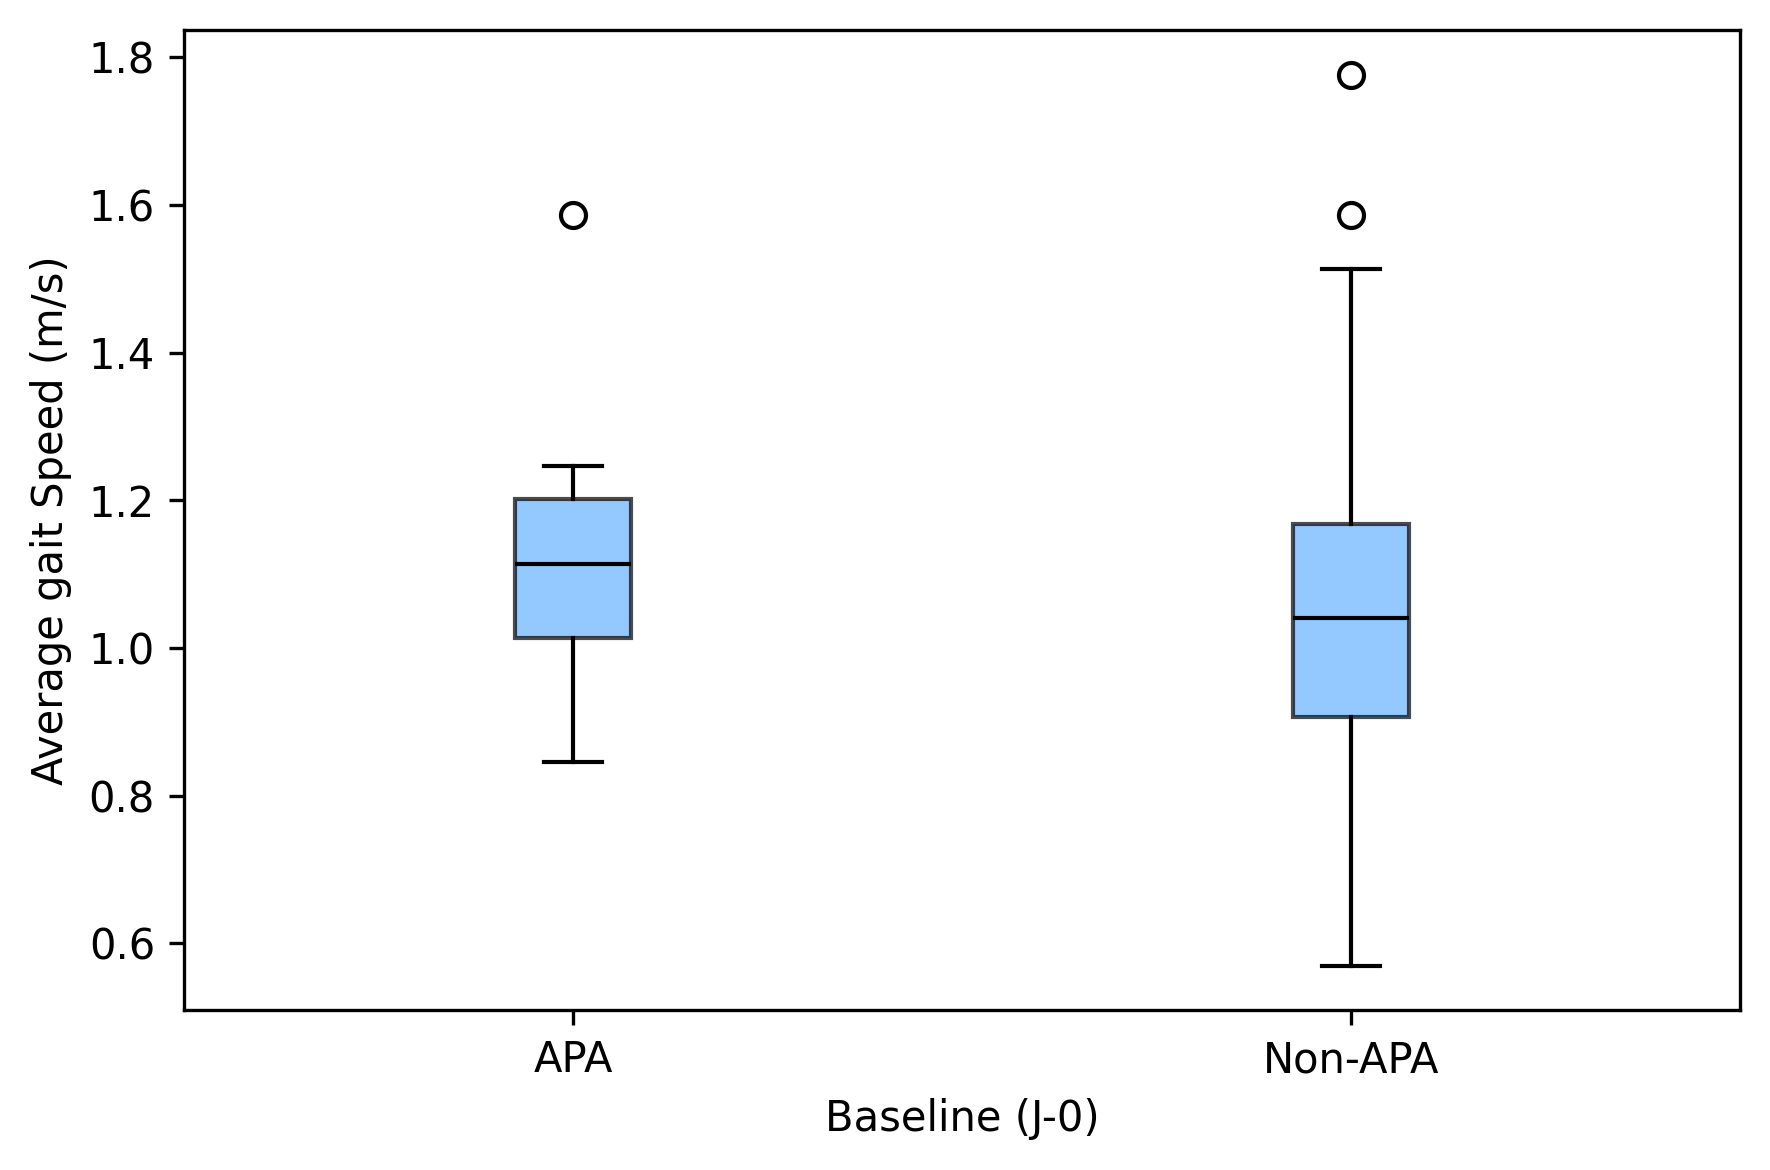

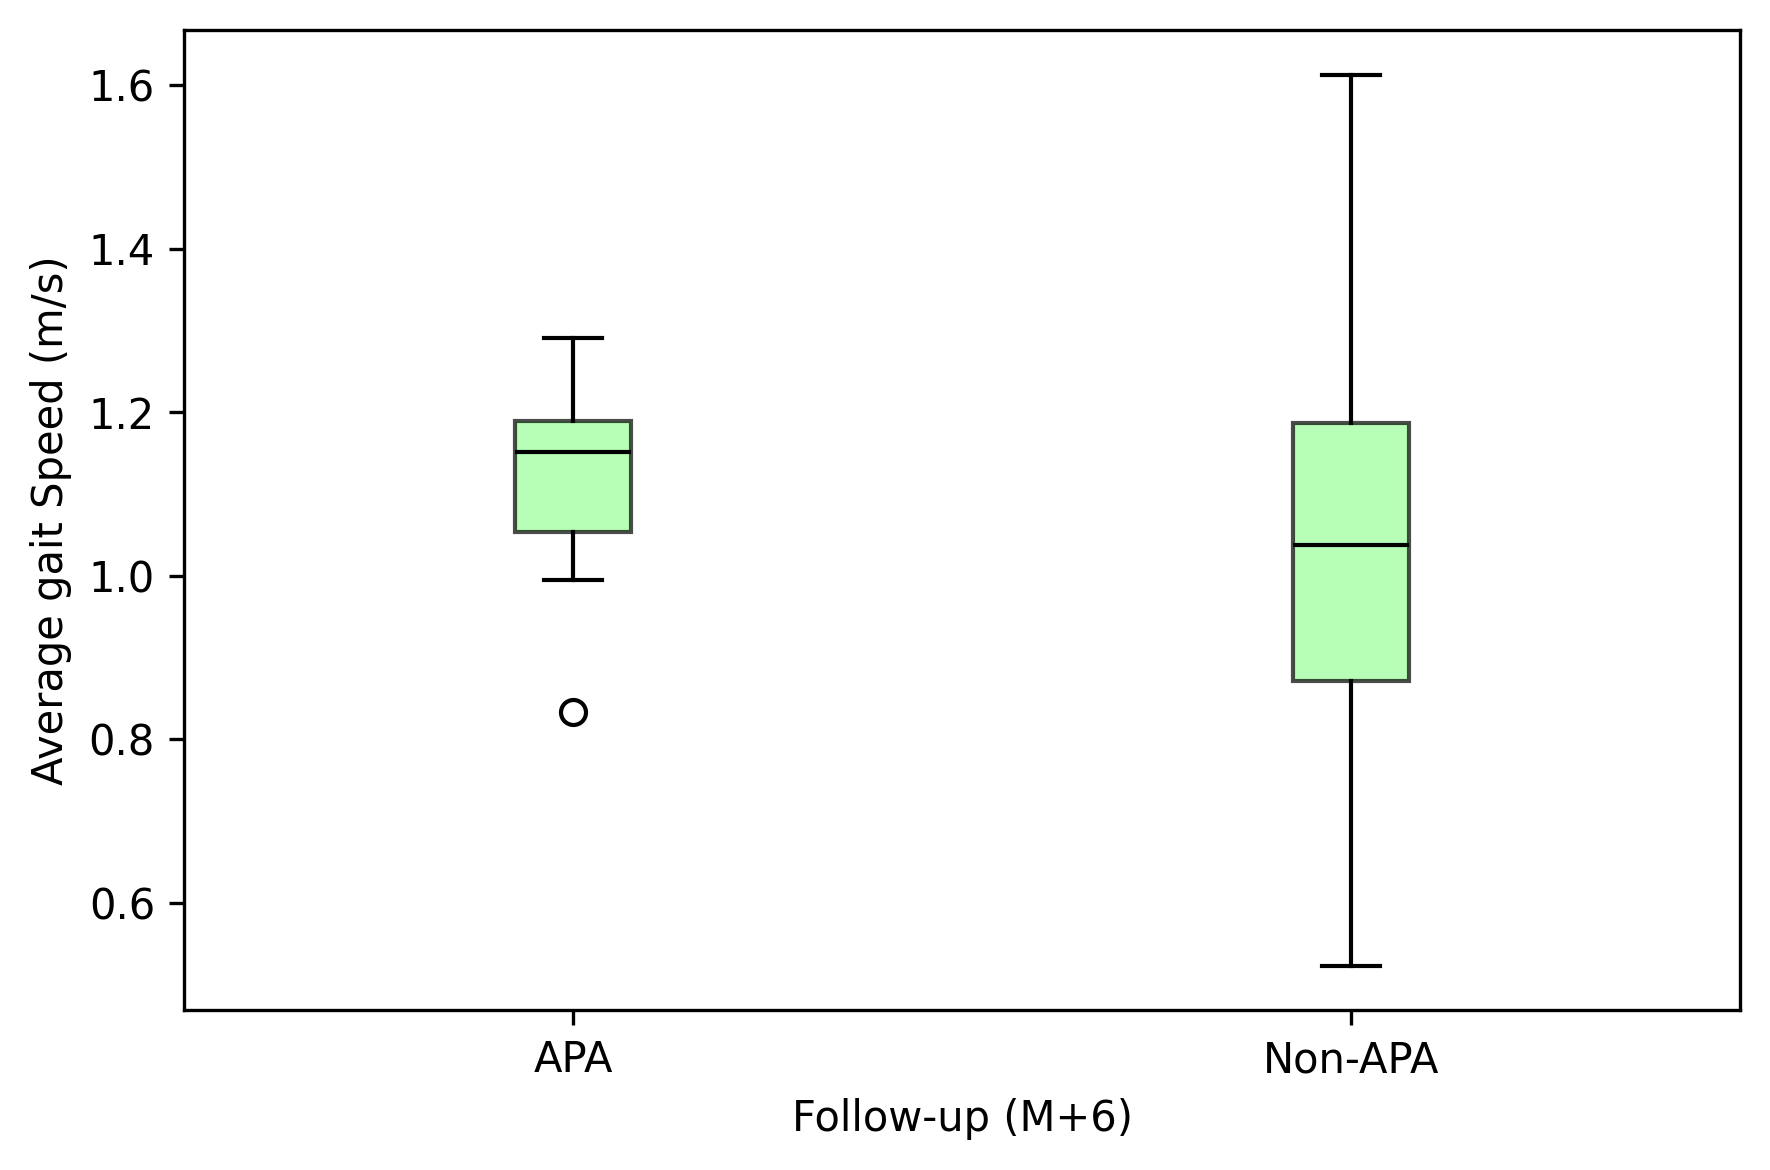

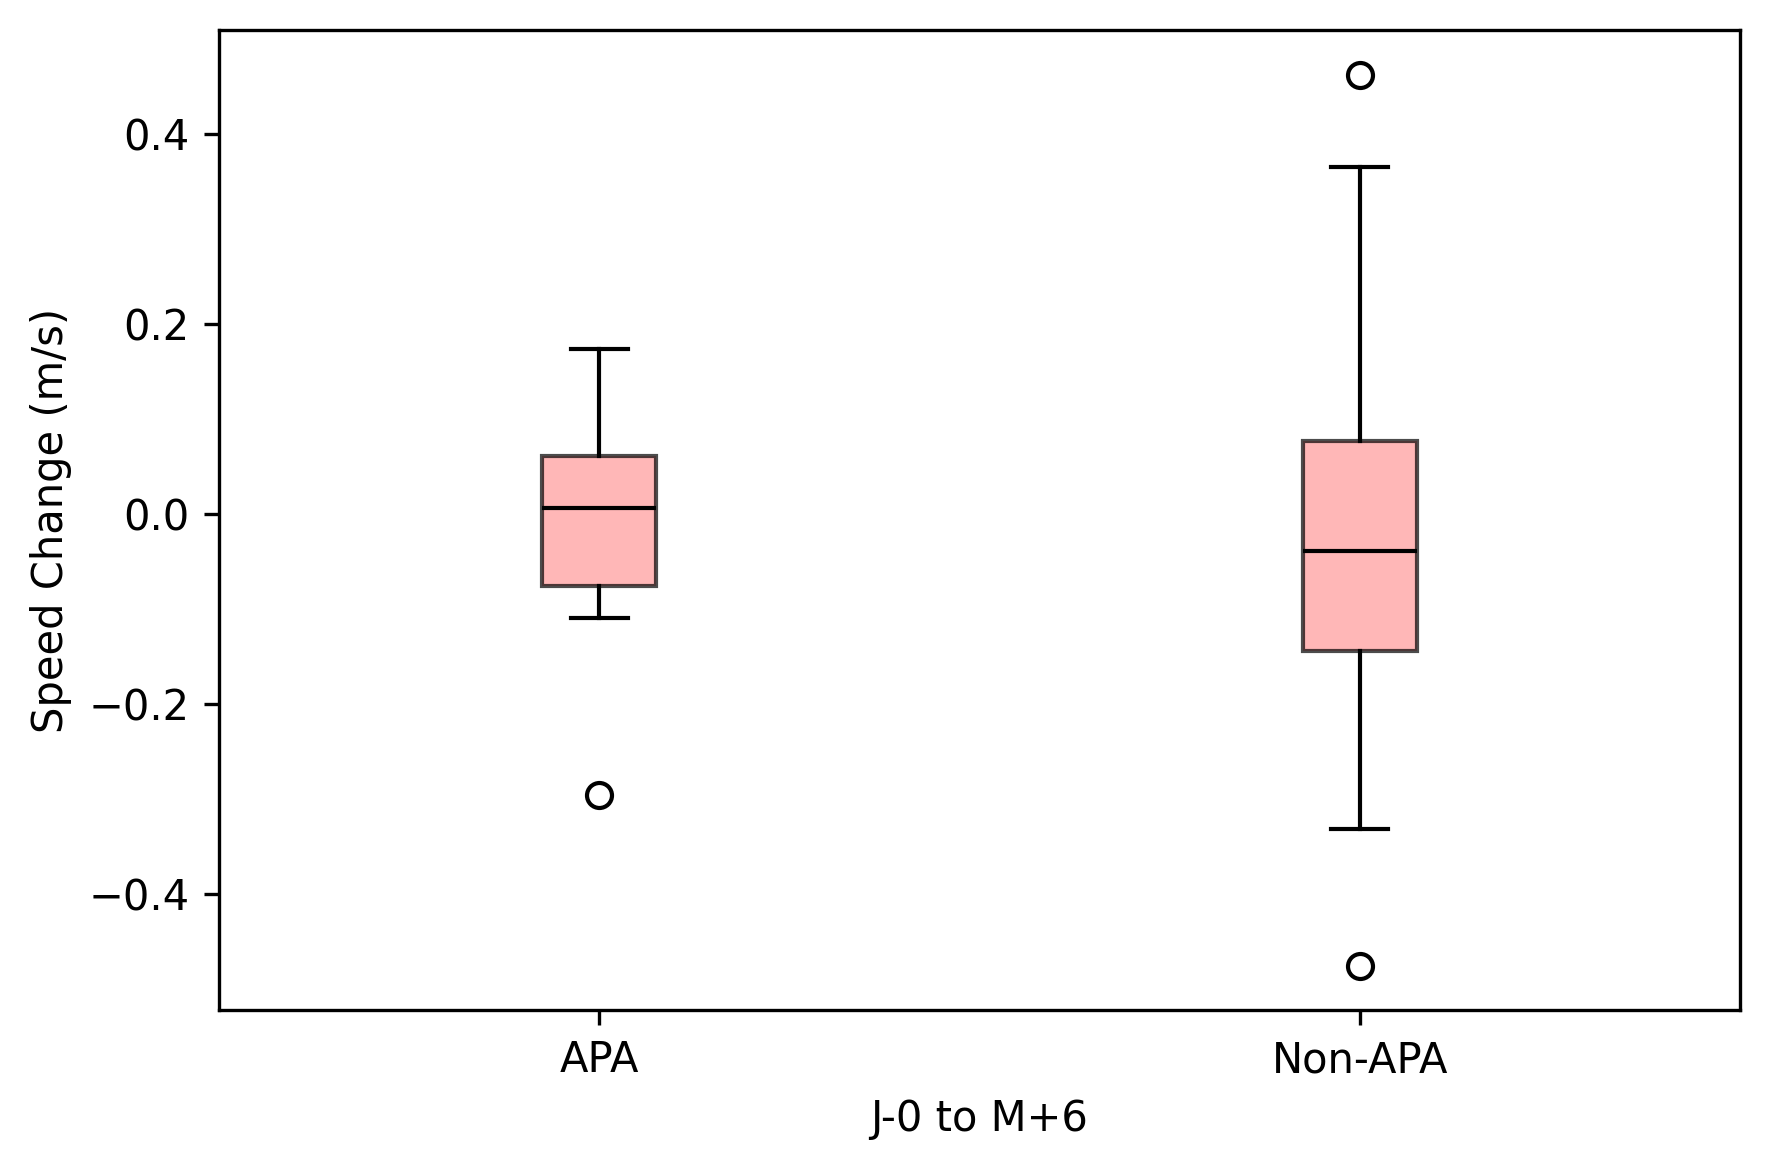

{'Between groups at J-0 (Mann-Whitney U test)': 0.4113692343662911,
 'Between groups at M+6 (Mann-Whitney U test)': 0.31582586992885653,
 'Between groups for Speed Change (Mann-Whitney U test)': 0.7257022976568788}

In [7]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Ensure participants with complete baseline and follow-up data are included
data_examclin023 = data[['EXAMCLIN023', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin023 = data_examclin023.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate Speed Change (Follow-up - Baseline)
data_examclin023['Speed_Change'] = data_examclin023['AvgSpeed_follow-up'] - data_examclin023['AvgSpeed_baseline']

# Split data into APA participants and non-participants
apa_participants = data_examclin023[data_examclin023['EXAMCLIN023'] == 1]
non_apa_participants = data_examclin023[data_examclin023['EXAMCLIN023'] == 0]

# 1. Mann-Whitney U test at J-0 (Baseline)
between_group_baseline = mannwhitneyu(apa_participants['AvgSpeed_baseline'], non_apa_participants['AvgSpeed_baseline'])

# 2. Mann-Whitney U test at M+6 (Follow-up)
between_group_followup = mannwhitneyu(apa_participants['AvgSpeed_follow-up'], non_apa_participants['AvgSpeed_follow-up'])

# 3. Mann-Whitney U test for Speed Change (J-0 to M+6)
between_group_speed_change = mannwhitneyu(apa_participants['Speed_Change'], non_apa_participants['Speed_Change'])

# Baseline comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [apa_participants['AvgSpeed_baseline'], non_apa_participants['AvgSpeed_baseline']],
    tick_labels=["APA", "Non-APA"],
    patch_artist=True,
    boxprops=dict(facecolor='#66B2FF', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Average gait Speed (m/s)")
plt.xlabel("Baseline (J-0)")
plt.tight_layout()
plt.show()

# Follow-up comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [apa_participants['AvgSpeed_follow-up'], non_apa_participants['AvgSpeed_follow-up']],
    tick_labels=["APA", "Non-APA"],
    patch_artist=True,
    boxprops=dict(facecolor='#99FF99', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Average gait Speed (m/s)")
plt.xlabel("Follow-up (M+6)")
plt.tight_layout()
plt.show()

# Speed Change comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [apa_participants['Speed_Change'], non_apa_participants['Speed_Change']],
    tick_labels=["APA", "Non-APA"],
    patch_artist=True,
    boxprops=dict(facecolor='#FF9999', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Speed Change (m/s)")
plt.xlabel("J-0 to M+6")
plt.tight_layout()
plt.show()

# Summarizing results
results_between_groups = {
    "Between groups at J-0 (Mann-Whitney U test)": between_group_baseline.pvalue,
    "Between groups at M+6 (Mann-Whitney U test)": between_group_followup.pvalue,
    "Between groups for Speed Change (Mann-Whitney U test)": between_group_speed_change.pvalue,
}

results_between_groups

### PHYSAC

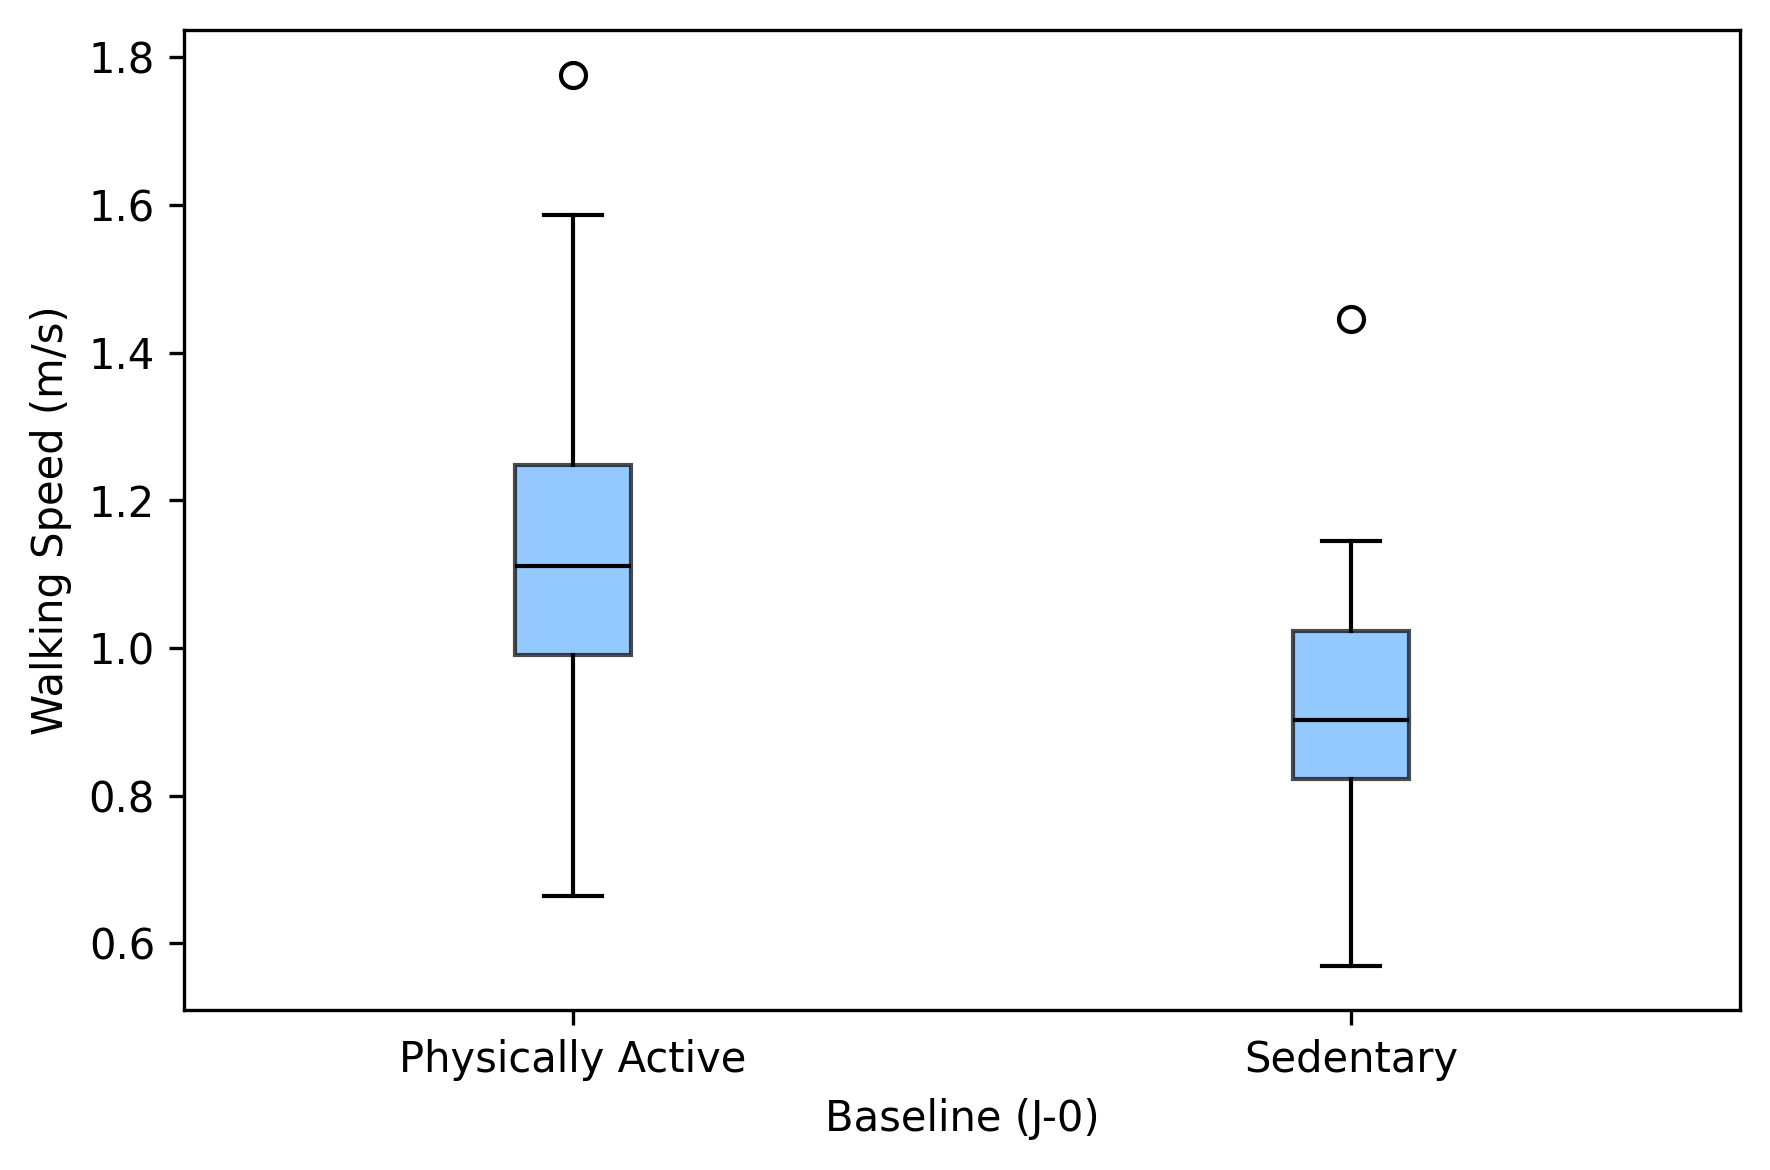

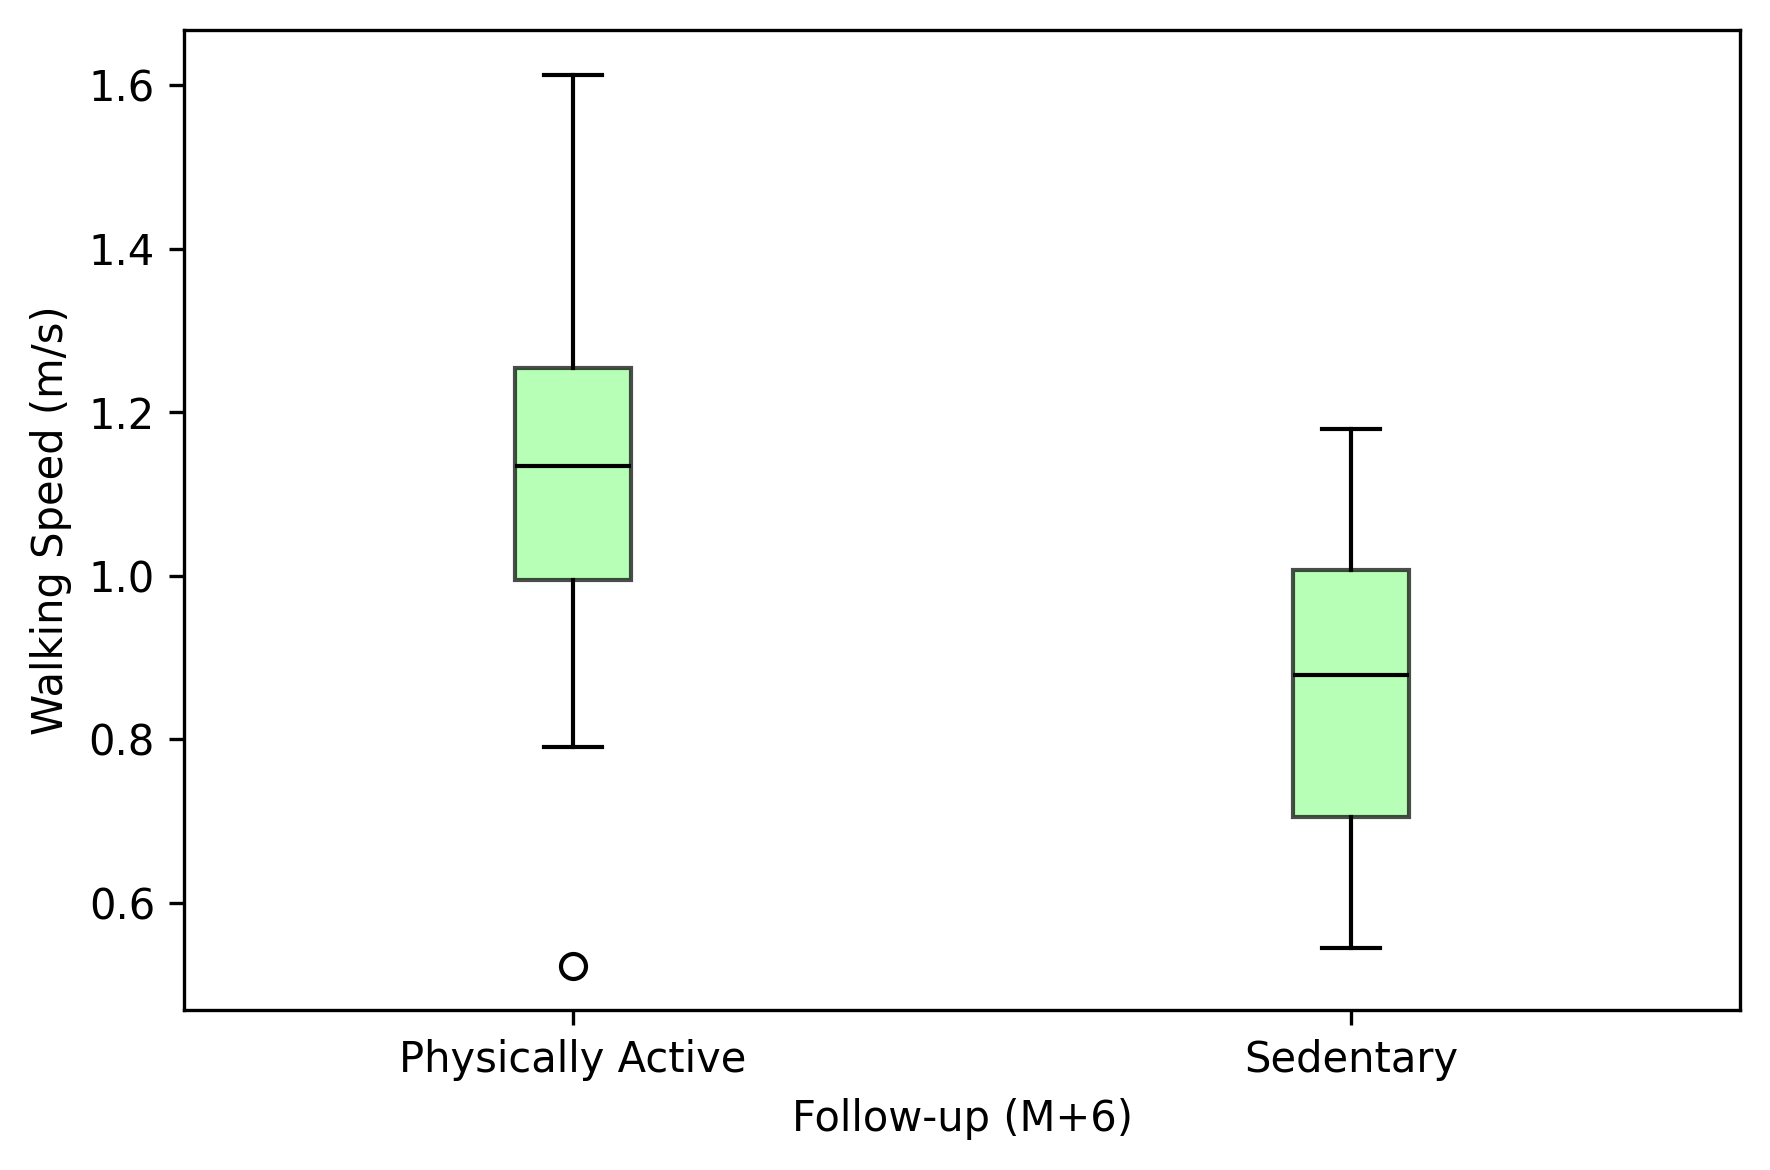

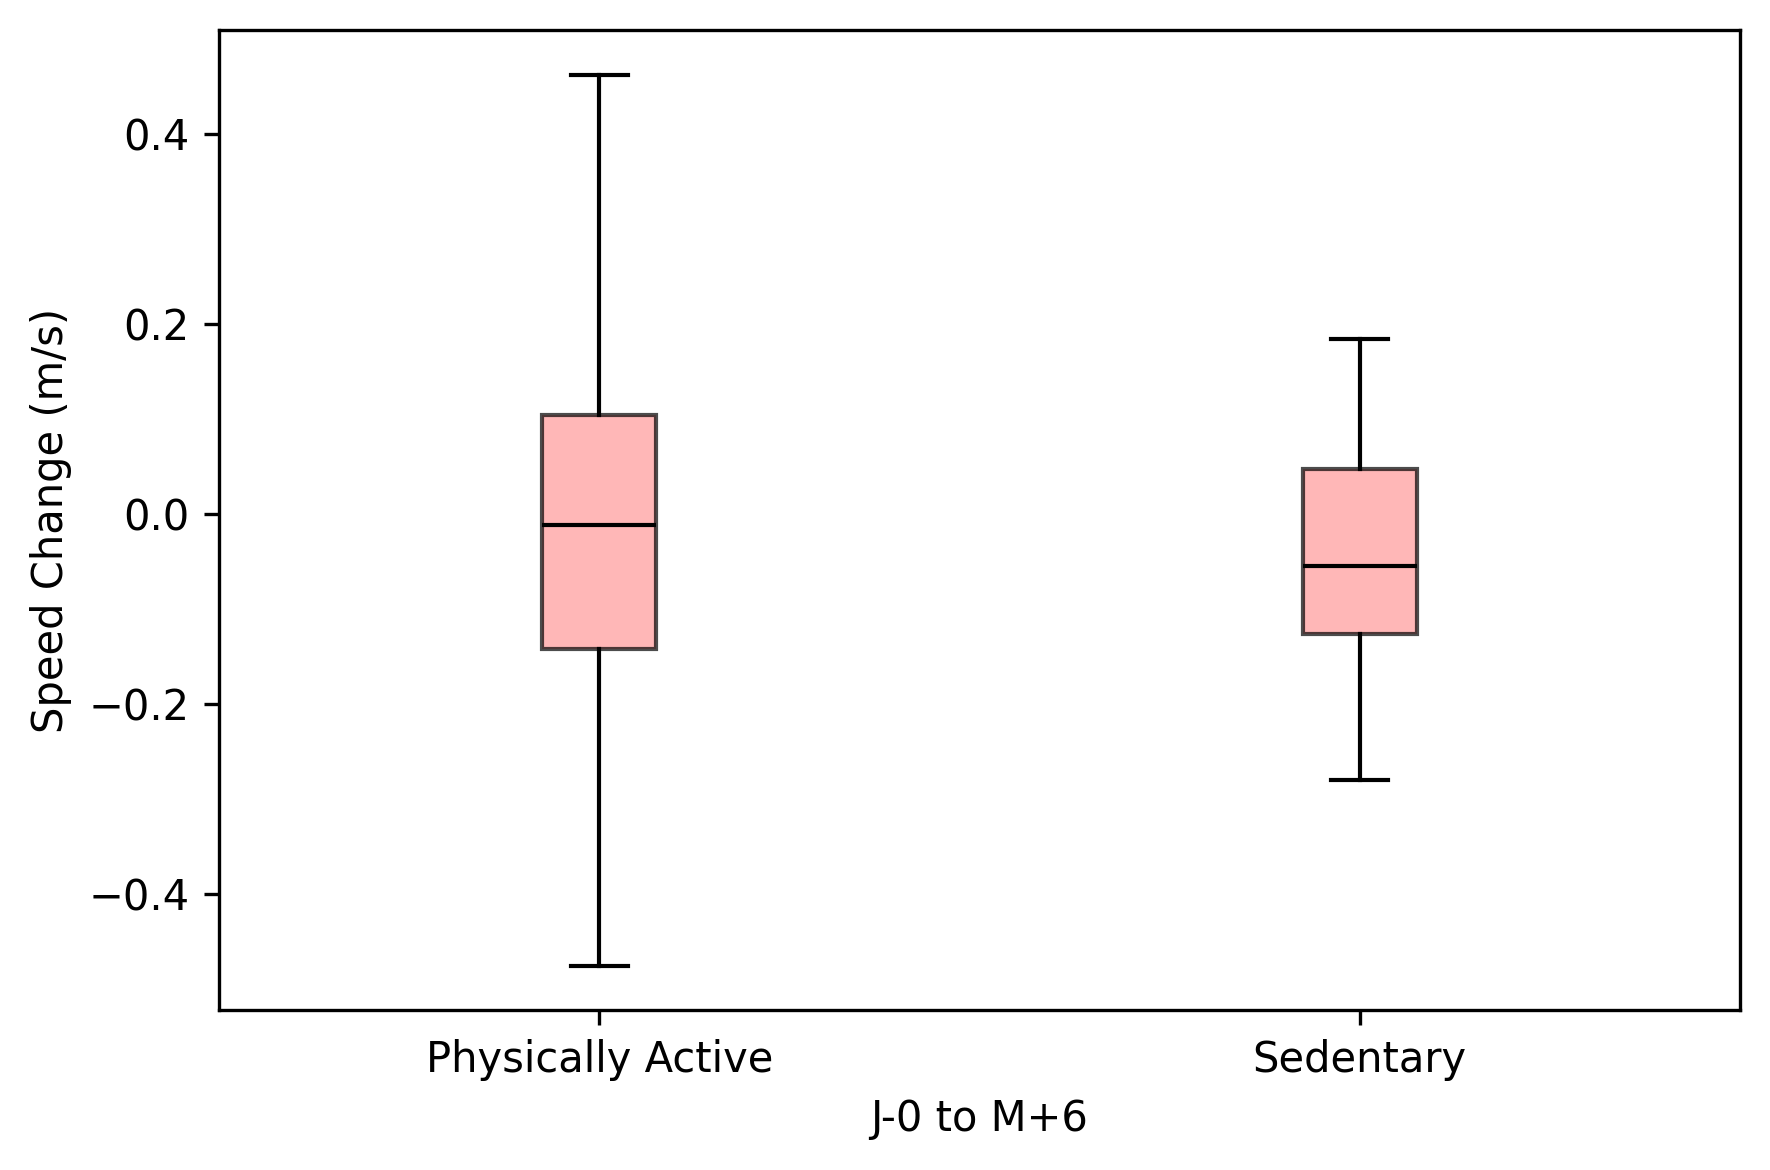

{'Between groups at J-0 (Mann-Whitney U test)': 9.98598537069385e-06,
 'Between groups at M+6 (Mann-Whitney U test)': 2.862171416368413e-06,
 'Between groups for Speed Change (Mann-Whitney U test)': 0.3949798726654109}

In [9]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_examclin02 = data[['EXAMCLIN02', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin02 = data_examclin02.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate speed change (follow-up - baseline)
data_examclin02['Speed_Change'] = data_examclin02['AvgSpeed_follow-up'] - data_examclin02['AvgSpeed_baseline']

# Split data into participants with and without physical activity
physac_participants = data_examclin02[data_examclin02['EXAMCLIN02'] == 1]
non_physac_participants = data_examclin02[data_examclin02['EXAMCLIN02'] == 0]

# 1. Mann-Whitney U test at J-0 (Baseline)
between_group_physac_baseline = mannwhitneyu(physac_participants['AvgSpeed_baseline'], non_physac_participants['AvgSpeed_baseline'])

# 2. Mann-Whitney U test at M+6 (Follow-up)
between_group_physac_followup = mannwhitneyu(physac_participants['AvgSpeed_follow-up'], non_physac_participants['AvgSpeed_follow-up'])

# 3. Mann-Whitney U test for Speed Change (J-0 to M+6)
between_group_speed_change_physac = mannwhitneyu(physac_participants['Speed_Change'], non_physac_participants['Speed_Change'])

# Baseline comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [physac_participants['AvgSpeed_baseline'], non_physac_participants['AvgSpeed_baseline']],
    tick_labels=["Physically Active", "Sedentary"],
    patch_artist=True,
    boxprops=dict(facecolor='#66B2FF', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Walking Speed (m/s)")
plt.xlabel("Baseline (J-0)")
plt.tight_layout()
plt.show()

# Follow-up comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [physac_participants['AvgSpeed_follow-up'], non_physac_participants['AvgSpeed_follow-up']],
    tick_labels=["Physically Active", "Sedentary"],
    patch_artist=True,
    boxprops=dict(facecolor='#99FF99', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Walking Speed (m/s)")
plt.xlabel("Follow-up (M+6)")
plt.tight_layout()
plt.show()

# Speed Change comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [physac_participants['Speed_Change'], non_physac_participants['Speed_Change']],
    tick_labels=["Physically Active", "Sedentary"],
    patch_artist=True,
    boxprops=dict(facecolor='#FF9999', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Speed Change (m/s)")
plt.xlabel("J-0 to M+6")
plt.tight_layout()
plt.show()

# Summarizing results
results_physac = {
    "Between groups at J-0 (Mann-Whitney U test)": between_group_physac_baseline.pvalue,
    "Between groups at M+6 (Mann-Whitney U test)": between_group_physac_followup.pvalue,
    "Between groups for Speed Change (Mann-Whitney U test)": between_group_speed_change_physac.pvalue,
}

results_physac

### KINE

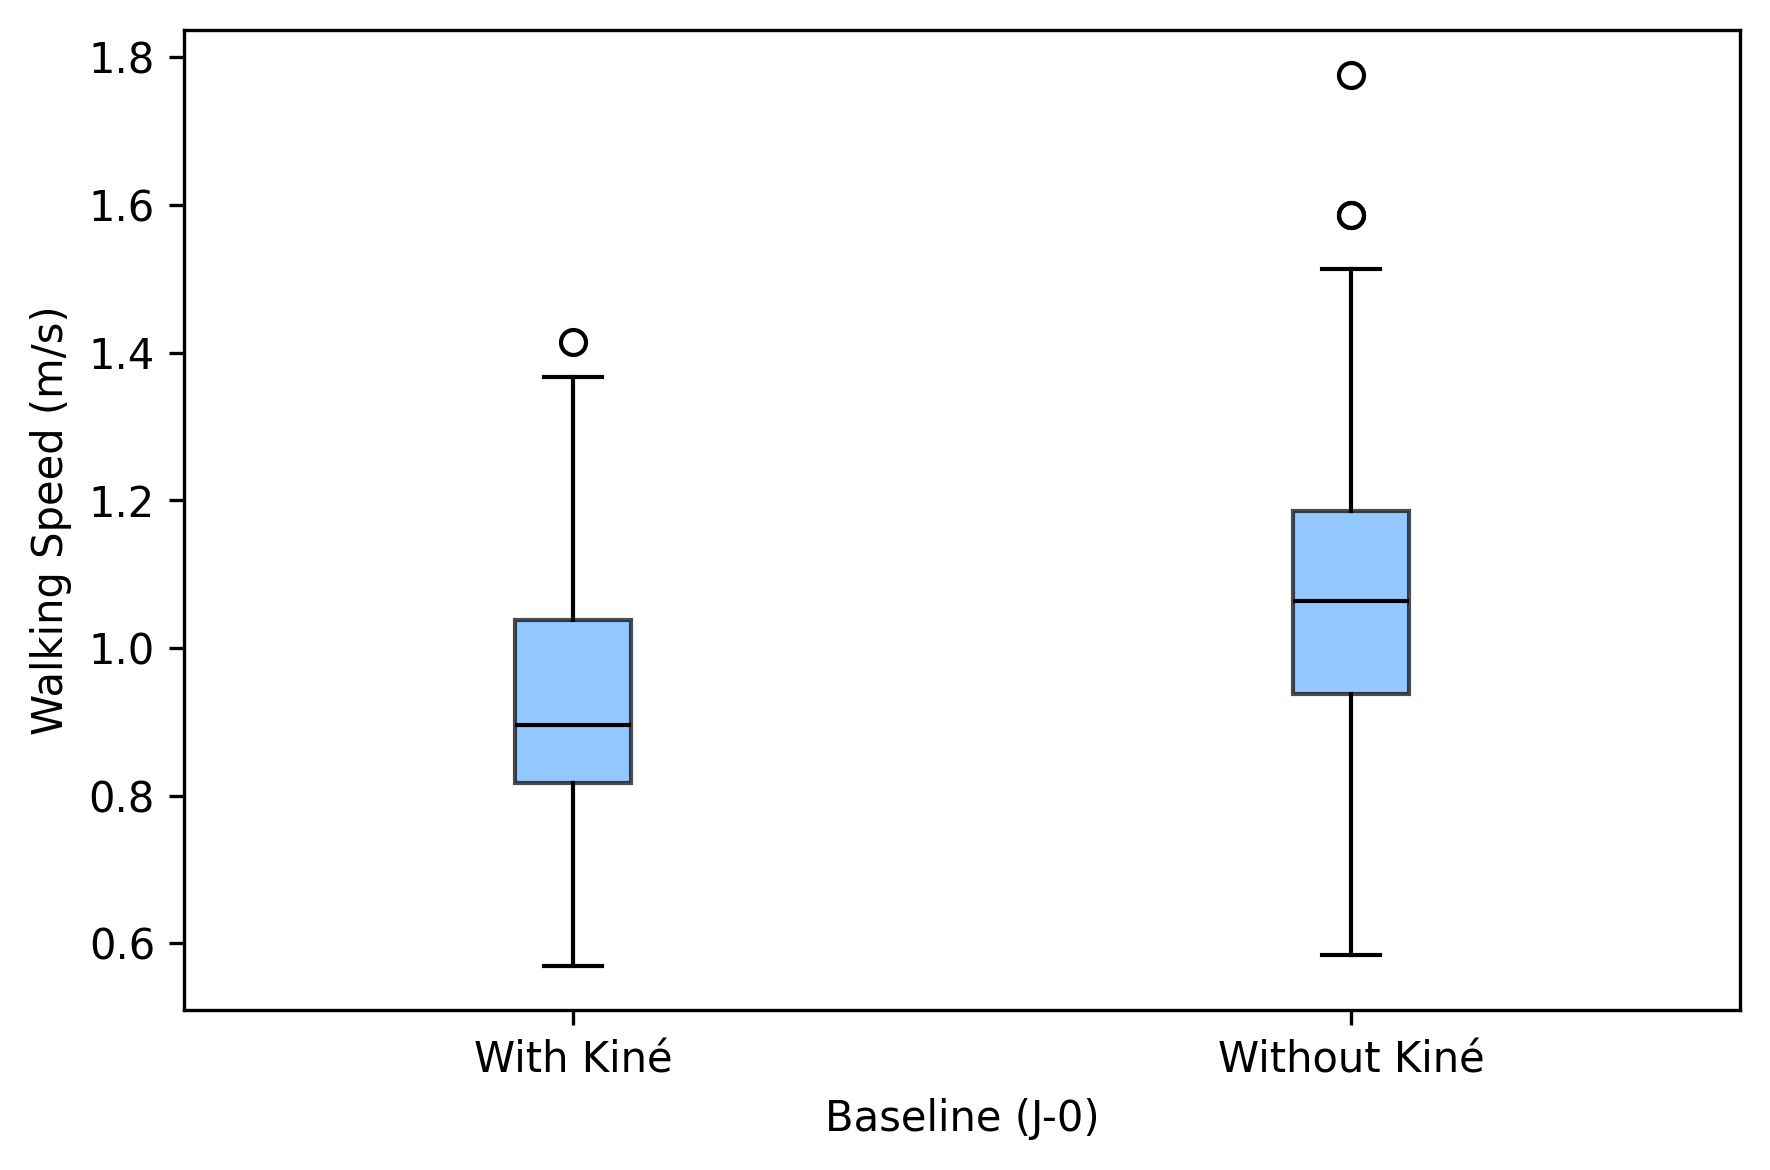

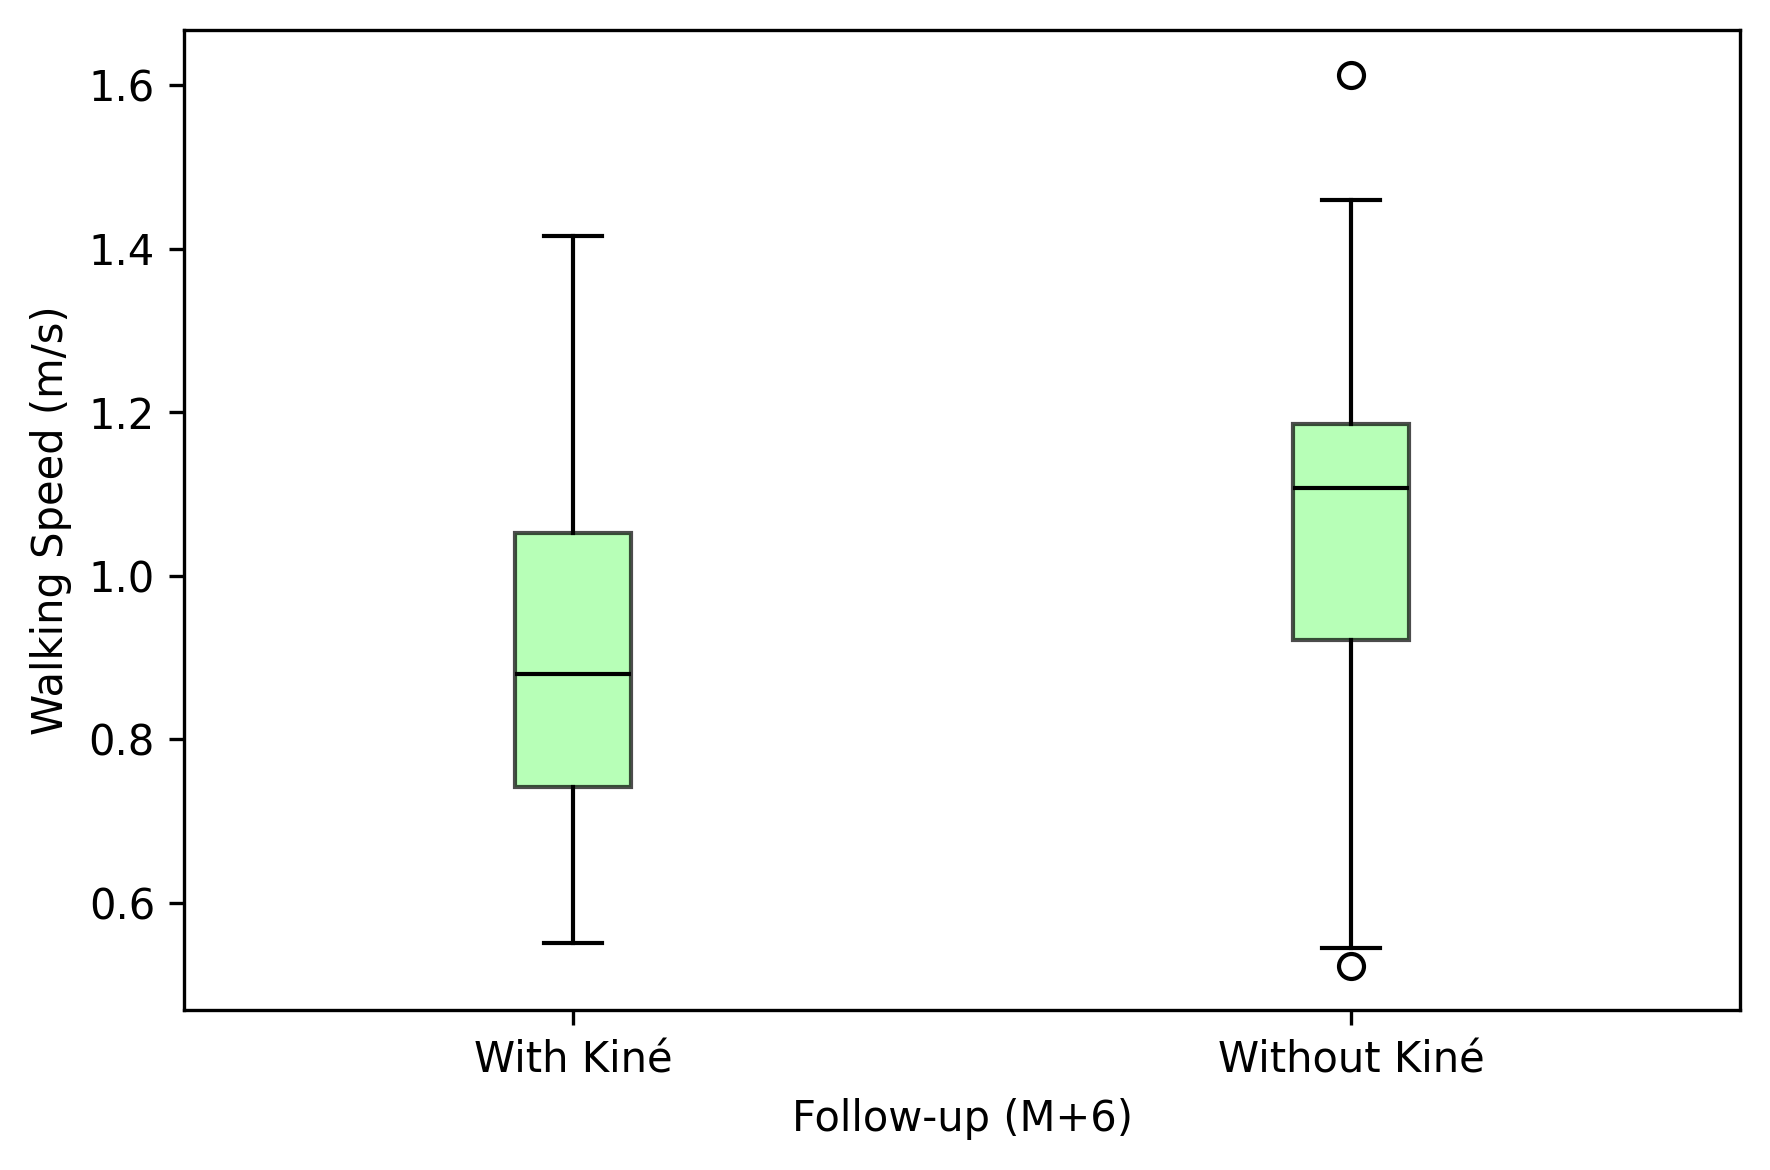

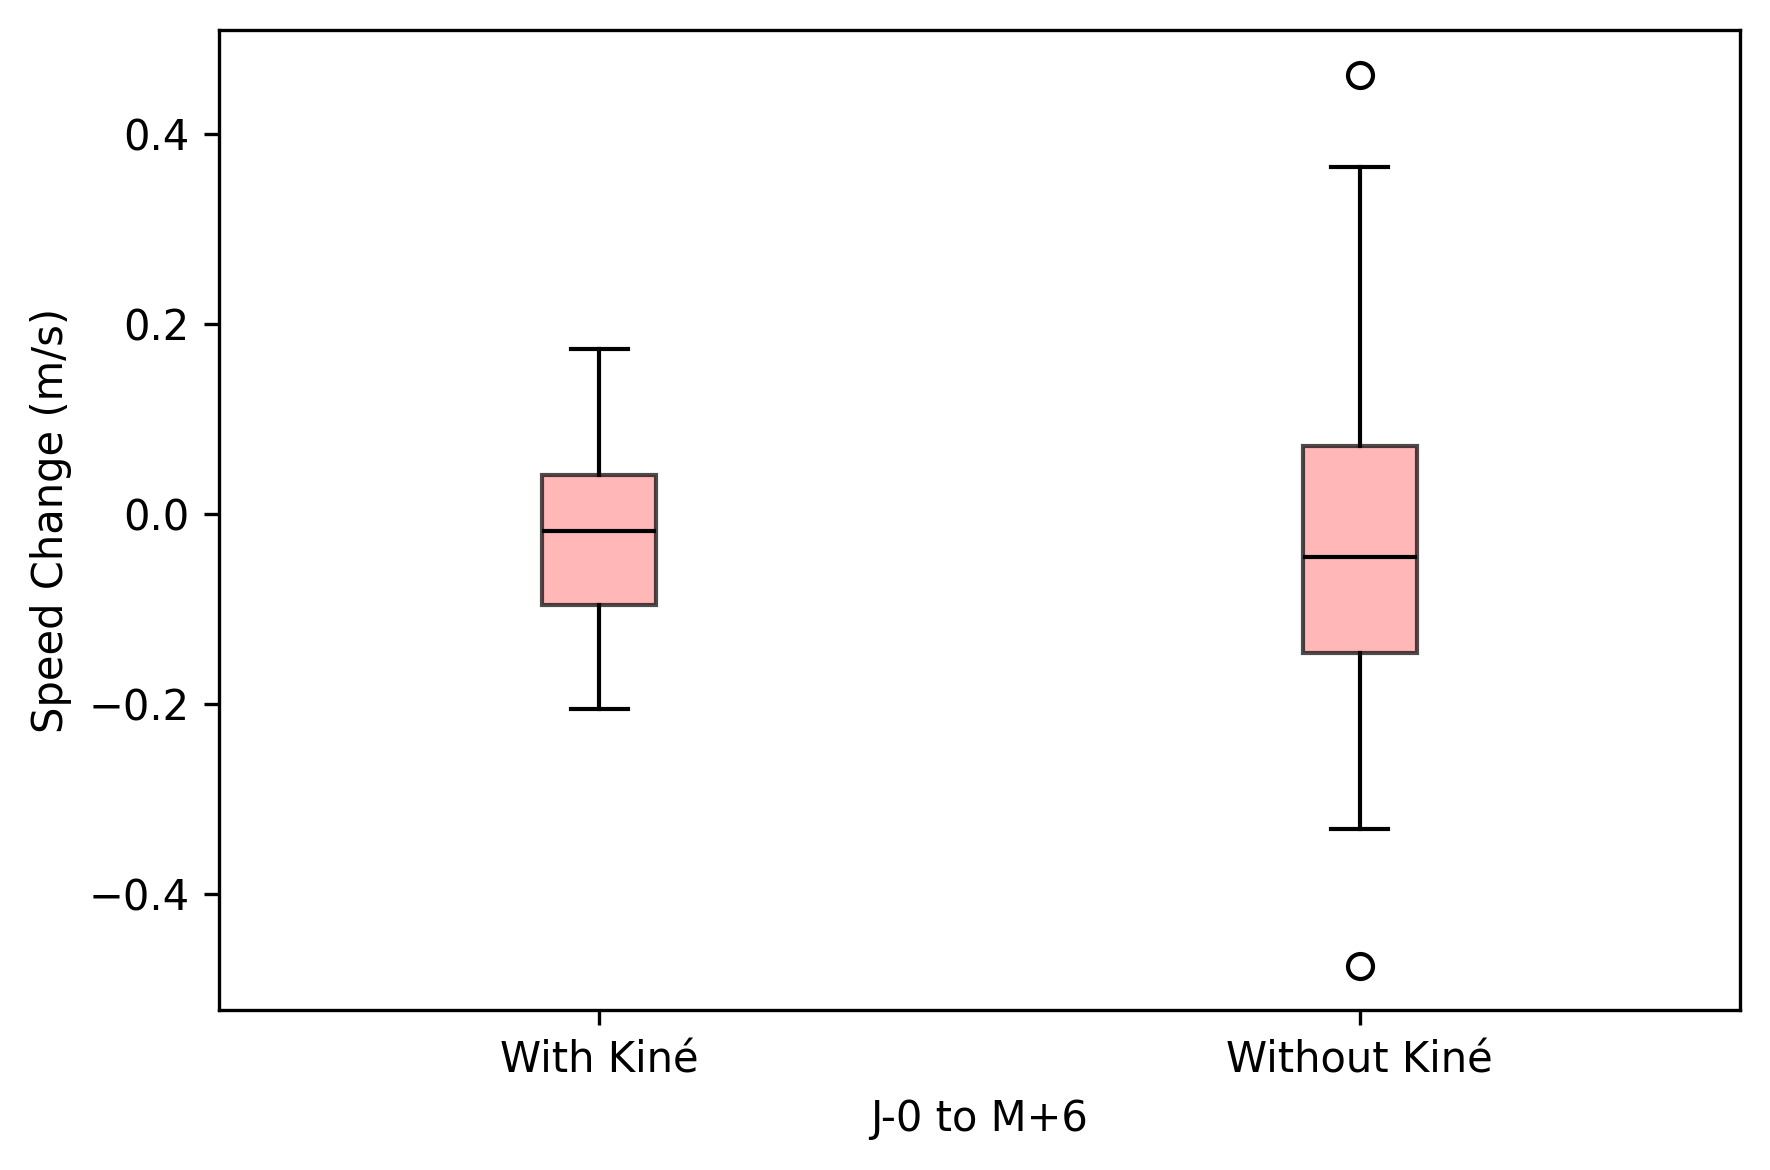

{'Between groups at J-0 (Mann-Whitney U test)': 0.024881867175393185,
 'Between groups at M+6 (Mann-Whitney U test)': 0.05622960073405514,
 'Between groups for Speed Change (Mann-Whitney U test)': 0.7009214387226219}

In [10]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Ensure participants with missing follow-up data are excluded
data_examclin022 = data[['EXAMCLIN022', 'AvgSpeed_baseline', 'AvgSpeed_follow-up']].copy()
data_examclin022 = data_examclin022.dropna(subset=['AvgSpeed_baseline', 'AvgSpeed_follow-up'])

# Calculate speed change (follow-up - baseline)
data_examclin022['Speed_Change'] = data_examclin022['AvgSpeed_follow-up'] - data_examclin022['AvgSpeed_baseline']

# Split data into Kine participants and non-participants
kine_participants = data_examclin022[data_examclin022['EXAMCLIN022'] == 1]
non_kine_participants = data_examclin022[data_examclin022['EXAMCLIN022'] == 0]

# 1. Mann-Whitney U test at J-0 (Baseline)
between_group_kine_baseline = mannwhitneyu(kine_participants['AvgSpeed_baseline'], non_kine_participants['AvgSpeed_baseline'])

# 2. Mann-Whitney U test at M+6 (Follow-up)
between_group_kine_followup = mannwhitneyu(kine_participants['AvgSpeed_follow-up'], non_kine_participants['AvgSpeed_follow-up'])

# 3. Mann-Whitney U test for Speed Change (J-0 to M+6)
between_group_speed_change_kine = mannwhitneyu(kine_participants['Speed_Change'], non_kine_participants['Speed_Change'])

# Baseline comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [kine_participants['AvgSpeed_baseline'], non_kine_participants['AvgSpeed_baseline']],
    tick_labels=["With Kiné", "Without Kiné"],
    patch_artist=True,
    boxprops=dict(facecolor='#66B2FF', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Walking Speed (m/s)")
plt.xlabel("Baseline (J-0)")
plt.tight_layout()
plt.show()

# Follow-up comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [kine_participants['AvgSpeed_follow-up'], non_kine_participants['AvgSpeed_follow-up']],
    tick_labels=["With Kiné", "Without Kiné"],
    patch_artist=True,
    boxprops=dict(facecolor='#99FF99', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Walking Speed (m/s)")
plt.xlabel("Follow-up (M+6)")
plt.tight_layout()
plt.show()

# Speed Change comparison
plt.figure(figsize=(6, 4), dpi=300)
plt.boxplot(
    [kine_participants['Speed_Change'], non_kine_participants['Speed_Change']],
    tick_labels=["With Kiné", "Without Kiné"],
    patch_artist=True,
    boxprops=dict(facecolor='#FF9999', alpha=0.7),
    medianprops=dict(color='black')
)
plt.ylabel("Speed Change (m/s)")
plt.xlabel("J-0 to M+6")
plt.tight_layout()
plt.show()

# Summarizing results with p-values only
results_kine = {
    "Between groups at J-0 (Mann-Whitney U test)": between_group_kine_baseline.pvalue,
    "Between groups at M+6 (Mann-Whitney U test)": between_group_kine_followup.pvalue,
    "Between groups for Speed Change (Mann-Whitney U test)": between_group_speed_change_kine.pvalue
}

results_kine